In [5]:
import utils
from importlib import reload
# reload(utils)

### All Paths

In [6]:
CSV_FOLDER = '../../../../data/cells/raw/csv/'
INSTANCES_FOLDER = '../../../../data/cells/raw/masks/'
INPUT_FOLDER = '../../../../data/cells/raw/input/'

ZARR_FOLDER = '../../../../data/cells/raw/zarr/'
RAW = 'raw'
INSTANCES = 'instances'
GT = 'ground_truth'

### Generate Zarr

In [7]:
utils.create_zarr_per_pair(INPUT_FOLDER,INSTANCES_FOLDER,CSV_FOLDER,ZARR_FOLDER)

0 - ../../../../data/cells/raw/zarr/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_8_ch_4.zarr
Reading image: ../../../../data/cells/raw/input/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_8_ch_4.tif
Reading image: ../../../../data/cells/raw/masks/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_8_ch_4_0_204.tif
Reading image: ../../../../data/cells/raw/masks/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_8_ch_4_0_204.tif
The value to be activated in mask: [0 1 2 3] 
Img size        : (1024, 1024, 4) uint8 < 255
Instances size  : (1024, 1024) int32 < 204
Categories size : (1024, 1024, 4) int64 < 4
After normalization: 
Img size        : (1024, 1024, 4) float32 < 1.0
Categories size : (1024, 1024, 4) float32 < 1.0
1 - ../../../../data/cells/raw/zarr/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_1_ch_4.zarr
Reading image: ../../../../data/cells/raw/input/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_1_ch_4.tif
Reading image: ../../../../data/cells/raw/masks/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_1_ch_4_0_1

### Test

In [9]:
TEST = '../../../../data/cells/raw/zarr/test/'
ZARR_PATH = os.path.join(TEST,os.listdir(TEST)[0])
file = zarr.open(ZARR_PATH, mode='r')

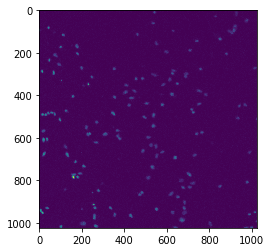

In [14]:
import matplotlib.pyplot as plt
plt.imshow(file[RAW][:,:,0])
plt.show()

In [15]:
print(file[RAW].shape)
print(file[RAW].dtype)

(1024, 1024, 4)
float32


In [16]:
print(file[GT].shape)
print(file[GT].dtype)

(1024, 1024, 4)
float32


In [17]:
print(file[INSTANCES].shape)
print(file[INSTANCES].dtype)

(1024, 1024)
int32


In [134]:
# INPUT_FOLDER,INSTANCES_FOLDER,CSV_FOLDER,ZARR_FOLDER
pairs = generate_pairs(CSV_FOLDER,INSTANCES_FOLDER)

In [135]:
csv = list(pairs.keys())[2]
inst = pairs[csv]

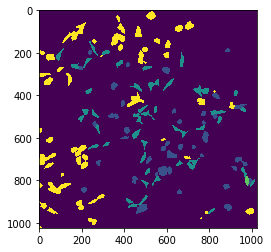

In [136]:
plt.imshow(im_categ)

In [137]:
for csv,inst in pairs.items():
    im_categ = generateCategoryImage(inst,csv)
    vals = np.unique(im_categ)
    print(vals)


Reading image: ../../../../data/cells/raw/masks/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_8_ch_4_0_204.tif
[-1  0  1  2  4]
Reading image: ../../../../data/cells/raw/masks/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_1_ch_4_0_166.tif
[-1  0  1  2  3]
Reading image: ../../../../data/cells/raw/masks/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_2_ch_4_0_90.tif
[0 1 2 4]
Reading image: ../../../../data/cells/raw/masks/ND8_DIV0+4h_20x_noConfinment_5_ch_4_0_412.tif
[0 1 2 3 4]
Reading image: ../../../../data/cells/raw/masks/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_18_ch_4_0_149.tif
[0 1 2 3 4]
Reading image: ../../../../data/cells/raw/masks/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_15_ch_4_0_156.tif
[0 1 2 3 4]
Reading image: ../../../../data/cells/raw/masks/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_4_ch_4_0_159.tif
[0 1 2 3 4]


In [138]:
normalized_mask = normalize_mask(im_categ,np.array([0,1,2,3]))

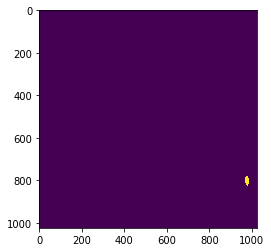

In [139]:
plt.imshow(normalized_mask[:,:,3])

In [140]:
normalized_mask.shape

(1024, 1024, 4)